# Declaration of Originality

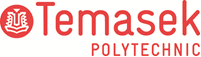

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Isaac Tan (2402193C)
* Tutorial Group                : PC02
* Tutor						    : Ester Goh
* Submission Date               : 11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [43]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import math

# 1. Business Understanding
Goal: The goal of this project is to build a model that predicts whether an individual is likely to have diabetes (Diabetes_binary = 1) using the available health, lifestyle, and demographic variables (such as HighBP, HighChol, BMI, PhysActivity, Age, Income and others). This is a binary classification problem where the output is either diabetic or not diabetic.

In a real life, this model supports early risk identification. Healthcare providers or public health agencies can use the predictions to prioritize screening, health education, and preventive interventions for people who are most at risk. This is helpful as early detection reduces the chances of long‑term complications such kidney disease, cardiovascular issues, etc. and lowers healthcare costs, while improving patient outcomes. Therefore, the business value comes from catching high risk cases earlier and allocating medical resources more effectively.

Because diabetes is costly to miss, recall for the positive class is a key success criterion. Missing a true diabetic case (false negative) means the person might not receive timely care. However, extremely low precision will cause too many false alarms and waste clinical resources. So the model should balance sensitivity with practicality.

# 2. Data Understanding

## 2.1 Load dataset

In [44]:
# Read *.csv file into pandas DataFrame
df = pd.read_csv('diabetes.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


## 2.2 Summary Statistics

In [45]:
## Understand the type of variable for each column
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [46]:
## Check for missing data
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [47]:
## Describe data distribution

print("Numerical Summary:")
display(df.describe())

Numerical Summary:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

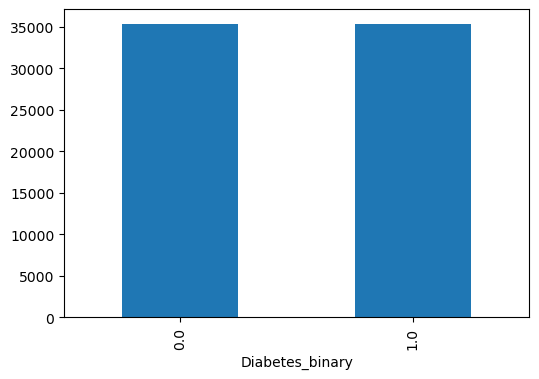

In [48]:
## Understanding distribution of target

plt.figure(figsize=(6,4))
df['Diabetes_binary'].value_counts().plot(kind='bar')
plt.show()

### 2.3.1.2 Understanding distribution of features

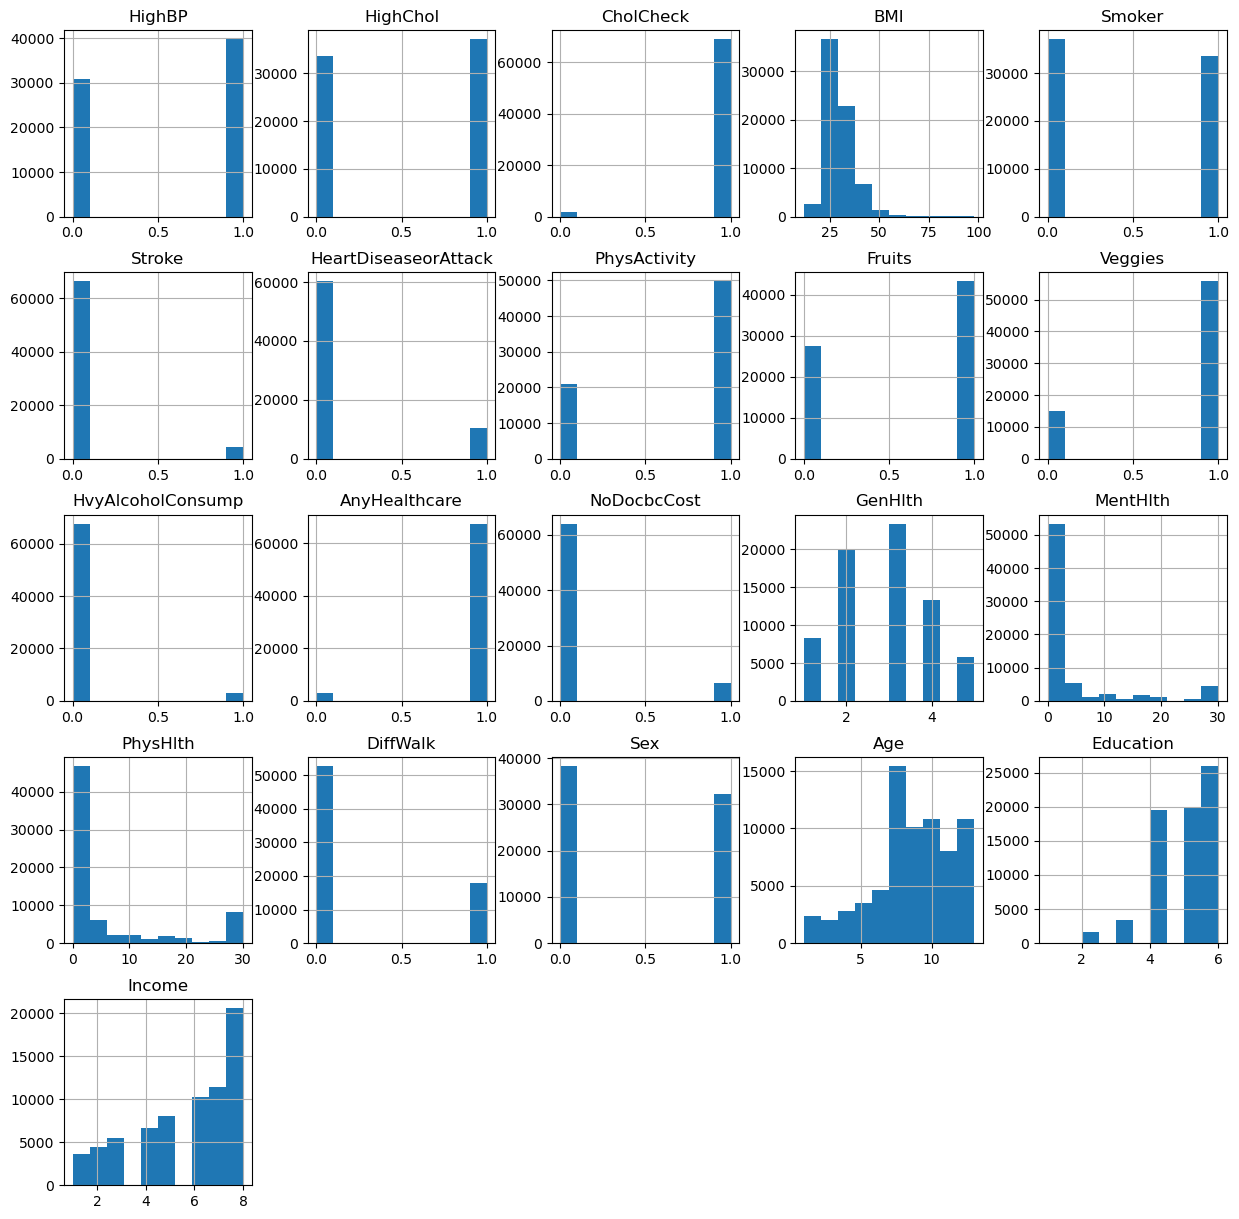

In [49]:
## Understanding distribution of features
# histogram for each feature to understand their distributions
df.drop("Diabetes_binary", axis=1).hist(figsize=(15,15))
plt.show()

In [50]:
# Since one hot encoding has already been applied to the dataset,
# we can split the numerical features into normal numerical data
# and binary data that only have 0 or 1 values.

cols = df.drop('Diabetes_binary', axis=1).columns.tolist()

# list comprehension
numerical_features = [
    col for col in cols
    if not set(df[col].unique()).issubset({0, 1})
]

binary_features = [
    col for col in cols
    if set(df[col].unique()).issubset({0, 1})
]

Redoing the histograms for numerical features only
df[numerical_features].hist(figsize=(15,15))
plt.show()



SyntaxError: invalid syntax (642751784.py, line 18)

In [ ]:

n = len(binary_features)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()  # make indexing easy

for ax, col in zip(axes, binary_features):
    df[col].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(col, fontsize=18)
    ax.set_xlabel('Value',fontsize=16)
    ax.set_ylabel('Count',fontsize=16)

# Hide unused subplots
for ax in axes[len(binary_features):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Box plots for numerical features to identify outliers 

df[numerical_features].plot(kind='box', subplots=True, layout=(6,3), figsize=(15,15))
plt.show()

### 2.3.2 Understanding relationship between variables

In [ ]:
# Correlation matrix
diabetes_corr = df.corr()

# Heat map
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes_corr, cmap="coolwarm")
plt.title("Correlation Heat Map of Diabetes Dataset")
plt.show()

In [ ]:
sns.pairplot(df[['Diabetes_binary','BMI','MentHlth','PhysHlth']], hue='Diabetes_binary')
plt.show()

In [ ]:
sns.pairplot(df[['Diabetes_binary','Income', 'Education', 'Age']], hue='Diabetes_binary')
plt.show()

In [ ]:
Box plots of numerical features grouped by target variable

n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numerical_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, x='Diabetes_binary', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Diabetes_binary')

Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Binary Features vs Diabetes_binary
# Count plot to show the relationship between binary features and diabetes

n_cols = 3  
n_rows = math.ceil(len(binary_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(binary_features):
    sns.countplot(x=col, hue='Diabetes_binary', data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Diabetes_binary')
    axes[i].legend(title='Diabetes_binary')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



NameError: name 'binary_features' is not defined

# 3. Data Preparation

## 3.1 Data Cleaning

Since one hot encoding has already been applied to the dataset,  and there are no missing values, no one hot encoding or value imputation is required.


For removing outliers, the outliers in PhysHlth, MentHlth and BMI will not be consired as these values are valid by definition. 

PhysHlth represents the question: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past
30 days was your physical health not good?

and MentHlth represents the question: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many
days during the past 30 days was your mental health not good?

(Feature descriptions can be found in this link: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)

MentHlth and PhysHlth is bounded between:

Minimum = 0 days and Maximum = 30 days
So values such as 20, 25 or 30 are not measurement mistakes, but instead they represent people struggling almost every day. Although statistically looking like outliers, clinically and socially they are important observations as they are likely the ones that could have diabetes.

Removing them would mean deleting data from people with severe mental distress biasing the dataset toward healthier individuals.

BMI is a continuous physiological variable where extreme values often represent clinically significant conditions rather than measurement errors. Unlike arbitrary outliers, high BMI values (40-60+) indicate severe obesity classes that are strongly associated with chronic diseases (such as diabetes potentially), while very low BMI values (<16) indicate severe underweight or malnutrition. Therefore, both are critical for health outcome prediction. 

In [ ]:
# No cleaning to be done

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Now that the data is split, scaling can be applied 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# 3. Transform test data using the same scaler
X_test = scaler.transform(X_test)

In [ ]:
# # Now that the train test split has been created, 
# # Feature Importance can be calculated using Random Forest
# from sklearn.ensemble import RandomForestClassifier

# # Train the Random Forest model first
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

# # Get feature importances
# feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# print("\nTop 5 Risk Factors:")
# print(feature_importances.nlargest(5))

# # Visualize feature importances
# plt.figure(figsize=(10, 8))
# feature_importances.sort_values(ascending=True).plot(kind='barh')
# plt.xlabel('Feature Importance')
# plt.title('Random Forest Feature Importances')
# plt.tight_layout()
# plt.show()

# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model
from sklearn.linear_model import LogisticRegression
# LinearDiscriminantAnalysis is not used as it assumes that the features 
# follow a normal distribution and share identical variance across groups
# Logistic Regression is the superior choice because it makes no 
# distributional assumptions

logr = LogisticRegression(max_iter=5000)

logr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


# 5. Model Evaluation

--- Single Metrics ---
Accuracy:  0.7491
Recall:    0.7718
Precision: 0.7383
F1 Score:  0.7547
ROC AUC:   0.7491

--- Report ---
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



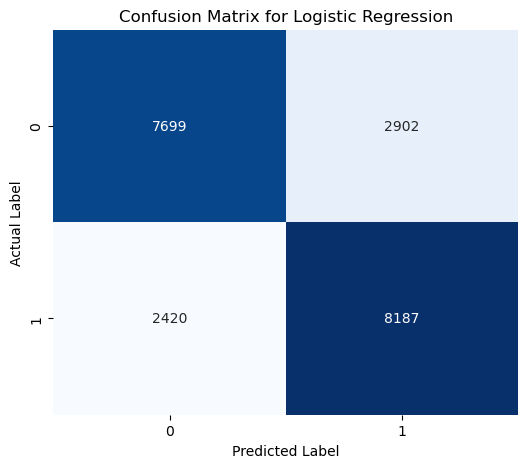

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Metrics
# For this dataset, Recall is the most important metric as we want to
# minimize false negatives (as failing to identify diabetic patients is more 
# dangerous than falsely telling someone who is healthy that they have diabetes).

# For this reason, Recall will be the metric used to select the best model
# during model selection/tuning.
y_pred = logr.predict(X_test)
print("--- Single Metrics ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}") 
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred):.4f}")

# Classification Report 
print("\n--- Report ---")
print(classification_report(y_test, y_pred))

# 3. Visual Confusion Matrix (To see WHERE errors happen)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
# comparing the model’s training metric vs testing metric across epochs 
# to see if it is underfitting or overfitting
# import wandb
# wandb.init(project="my-project")
# wandb.log({"loss": loss, "accuracy": acc})

## Iterative model development


Choosing the best model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Define Base Learners for Stacking
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('nb', GaussianNB())
]

# 2. Define Stacking Model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    cv=5
)

# 3. Define Dictionary of Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000), 

    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    
    "Random Forest": RandomForestClassifier(random_state=42),
    
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    
    "Gaussian Naive Bayes": GaussianNB(),
    
    "Stacking Ensemble": stacking_model
}

# 4. Loop through models, train, and print recall scores
results = {}

print(f"{'Model':<35} | {'Recall':<10}")
print("-" * 50)

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Make Predictions (Required for Recall calculation)
    y_pred = model.predict(X_test)
    
    # Calculate Recall
    recall = recall_score(y_test, y_pred)
    
    # Store and Print
    results[name] = recall
    print(f"{name:<35} | {recall:.4f} | Accuracy: {accuracy_score(y_test, y_pred):.4f} | F1: {f1_score(y_test, y_pred):.4f}")

# Find the winner based on RECALL
best_model_name = max(results, key=results.get)
print("-" * 50)
print(f"🏆 Best Model (Highest Recall): {best_model_name} with {results[best_model_name]:.4f} recall")

Model                               | Recall    
--------------------------------------------------
Logistic Regression                 | 0.7718 | Accuracy: 0.7491 | F1: 0.7547
Linear Discriminant Analysis        | 0.7791 | Accuracy: 0.7482 | F1: 0.7558
Random Forest                       | 0.7769 | Accuracy: 0.7386 | F1: 0.7483
Gradient Boosting                   | 0.8000 | Accuracy: 0.7555 | F1: 0.7660
Decision Tree                       | 0.6492 | Accuracy: 0.6570 | F1: 0.6543
Gaussian Naive Bayes                | 0.7120 | Accuracy: 0.7207 | F1: 0.7183
Stacking Ensemble                   | 0.7908 | Accuracy: 0.7552 | F1: 0.7637
--------------------------------------------------
🏆 Best Model (Highest Recall): Gradient Boosting with 0.8000 recall


In [ ]:
# Configuring hyperparameters for the best model (Gradient boosting in this case)
# from sklearn.model_selection import RandomizedSearchCV

# # Define the hyperparameter grid with no more than 3 values per hyperparameter
# param_dist = {
#     'n_estimators': [50, 100, 200],     # Number of boosting stages to perform
#     'learning_rate': [0.05, 0.1, 0.2],  # How much each tree contributes 
#     'max_depth': [5, 10, 15],             # Maximum depth of the individual regression estimators
#     'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
#     'subsample': [0.8, 0.9, 1.0]        # Fraction of samples used for fitting the individual base learners
# }

# # Reinitialize the Model
# gb = GradientBoostingClassifier(random_state=42)

# # Configure RandomizedSearchCV
# # n_iter=20 means it will try 20 random combinations from the grid above
# random_search = RandomizedSearchCV(
#     estimator=gb,
#     param_distributions=param_dist,
#     n_iter=20,              # Number of random combinations to try
#     scoring='recall',       # Optimizing for RECALL (Catching cases)
#     cv=5,                   # 5-Fold Cross-Validation
#     verbose=1,              # Print progress
#     random_state=42,
#     n_jobs=-1               # Use all available CPU cores
# )

# # Fit the Random Search
# print("Tuning Gradient Boosting for best Recall...")
# random_search.fit(X_train, y_train)

# # Display Best Results
# print("\n" + "="*40)
# print(f"🏆 Best Recall Score: {random_search.best_score_:.4f}")
# print("="*40)
# print("\nBest Hyperparameters:")
# for param, value in random_search.best_params_.items():
#     print(f" - {param}: {value}")

# # Evaluate on Test Set with Best Model
# best_gb_model = random_search.best_estimator_
# test_recall = recall_score(y_test, best_gb_model.predict(X_test))
# print(f"\nTest Set Recall: {test_recall:.4f}")

In [ ]:
gb_optimized = GradientBoostingClassifier(
    n_estimators=100,         # Number of trees
    learning_rate=0.1,        # Step size shrinking
    max_depth=5,              # Depth of each tree (slightly deeper than default 3)
    min_samples_split=2,      # Minimum samples to split a node
    subsample=1.0,            # Use 100% of data for each tree (standard boosting)
    random_state=42           # Ensures you get the same result every time
)

# 2. Train the Model
print("Training Gradient Boosting Model...")
gb_optimized.fit(X_train, y_train)

# 3. Make Predictions
y_pred_optimized = gb_optimized.predict(X_test)

# 4. Evaluate (Focusing on Recall)

print("\n" + "="*40)
print(f"Final Model Performance")
print("="*40)
print(f"Recall:    {recall_score(y_test, y_pred_optimized):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_optimized):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimized):.4f}") 
print(f"F1 Score:  {f1_score(y_test, y_pred_optimized):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred_optimized):.4f}")

Training Gradient Boosting Model...

Final Model Performance
Recall:    0.7998
Accuracy:  0.7534
Precision: 0.7319
F1 Score:  0.7644
ROC AUC:   0.7534


### Further feature engineering / feature selection


In [ ]:
## Further feature engineering / feature selection
# drop these rows as they did not have proper checks for their cholestral for the
# past 5 years
df_filtered = df[(df['CholCheck'] != 0) ]

X = df_filtered.drop('Diabetes_binary', axis=1)
y = df_filtered['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gb_optimized.fit(X_train, y_train)
y_pred = gb_optimized.predict(X_test)

print("--- Single Metrics ---")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}") 
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred):.4f}")

# Classification Report 
print("\n--- Report ---")
print(classification_report(y_test, y_pred))



--- Single Metrics ---
Recall:    0.8025
Accuracy:  0.7516
Precision: 0.7367
F1 Score:  0.7682
ROC AUC:   0.7503

--- Report ---
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10078
         1.0       0.74      0.80      0.77     10605

    accuracy                           0.75     20683
   macro avg       0.75      0.75      0.75     20683
weighted avg       0.75      0.75      0.75     20683



In [ ]:
# As seen from the logs above, removing CholCheck = 1 improved the model,
# increasing recall from 0.7998 to 0.8025, and F1 score of 0.7644 to 0.7682.
# However, accuracy decrease slightly from 0.7534 to 0.7516. Since recall was chosen
# as the most powerful metric for this model, the increase in recall and F1 score
# is worth the slight decrease in accuracy.
# Therefore, I will keep this change in the final model.
df = df_filtered.copy()

In [ ]:
# Feature Importance from the optimized Gradient Boosting model
importances = gb_optimized.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy sorting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# # Print the top feature
# highest_feature = feature_importance_df.iloc[0]
# print(f"The most important feature is: {highest_feature['Feature']}")
# print(f"Importance Score: {highest_feature['Importance']:.4f}")

# # Display the top 10
# print("\nTop Features:")
# print(feature_importance_df)

In [ ]:
# Iteratively drop the bottom 'i' features and evaluate model performance
# to find out how many features should be dropped for the best recall
results = []

for i in range(1, 16):
    # Select the bottom 'i' features to drop
    bottom_features = feature_importance_df.nsmallest(i, 'Importance')['Feature'].tolist()
    
    # Drop and split
    df_temp = df.drop(columns=bottom_features)
    X_featr = df_temp.drop('Diabetes_binary', axis=1)
    y_featr = df_temp['Diabetes_binary']
    
    X_train_featr, X_test_featr, y_train_featr, y_test_featr = train_test_split(X_featr, y_featr, test_size=0.3, random_state=42)
    
    # Fit and predict
    gb_optimized.fit(X_train_featr, y_train_featr)
    y_pred_featr = gb_optimized.predict(X_test_featr)
    
    current_recall = recall_score(y_test_featr, y_pred_featr)
    
    # Store results
    results.append({
        'dropped_count': i,
        'recall': current_recall,
        'accuracy': accuracy_score(y_test_featr, y_pred_featr),
        'f1_score': f1_score(y_test_featr, y_pred_featr),
        'precision': precision_score(y_test_featr, y_pred_featr),
        'features_removed': bottom_features
    })
    print(f"Dropped {i} features | Recall: {current_recall:.4f}")

# Find the best result
best_run = max(results, key=lambda x: x['recall'])

print('\n--- Best Recall Result ---')
print(f"Best Recall: {best_run['recall']:.4f}")
print(f"Accuracy:    {best_run['accuracy']:.4f}")
print(f"F1 Score:    {best_run['f1_score']:.4f}")
print(f"Precision:   {best_run['precision']:.4f}")
print(f"Number of features dropped: {best_run['dropped_count']}")
print(f"Features removed: {best_run['features_removed']}")
# Recall:    0.8025
# Accuracy:  0.7516
# Precision: 0.7367
# F1 Score:  0.7682
# ROC AUC:   0.7503

Dropped 1 features | Recall: 0.8025
Dropped 2 features | Recall: 0.8017
Dropped 3 features | Recall: 0.8024
Dropped 4 features | Recall: 0.8039
Dropped 5 features | Recall: 0.8029
Dropped 6 features | Recall: 0.8023
Dropped 7 features | Recall: 0.8014
Dropped 8 features | Recall: 0.8018
Dropped 9 features | Recall: 0.8026
Dropped 10 features | Recall: 0.8017
Dropped 11 features | Recall: 0.8026
Dropped 12 features | Recall: 0.7991
Dropped 13 features | Recall: 0.8023
Dropped 14 features | Recall: 0.8000
Dropped 15 features | Recall: 0.7993

--- Best Recall Result ---
Best Recall: 0.8039
Accuracy:    0.7514
F1 Score:    0.7683
Precision:   0.7358
Number of features dropped: 4
Features removed: ['CholCheck', 'PhysActivity', 'NoDocbcCost', 'AnyHealthcare']


In [ ]:
# Removing the bottom 4 least important features improved the model,
# increasing recall from 0.8025 to 0.8039, 
# and F1 score from 0.7682 to 0.7683.
# However, accuracy decreased slightly from 0.7516 to 0.7514.
# Since recall was chosen as the most powerful metric for this model,
# the increase in recall and F1 score is worth 
# the slight decrease in accuracy.
# Therefore, I will keep this change in the final model.
df = df.drop(columns=best_run['features_removed'])

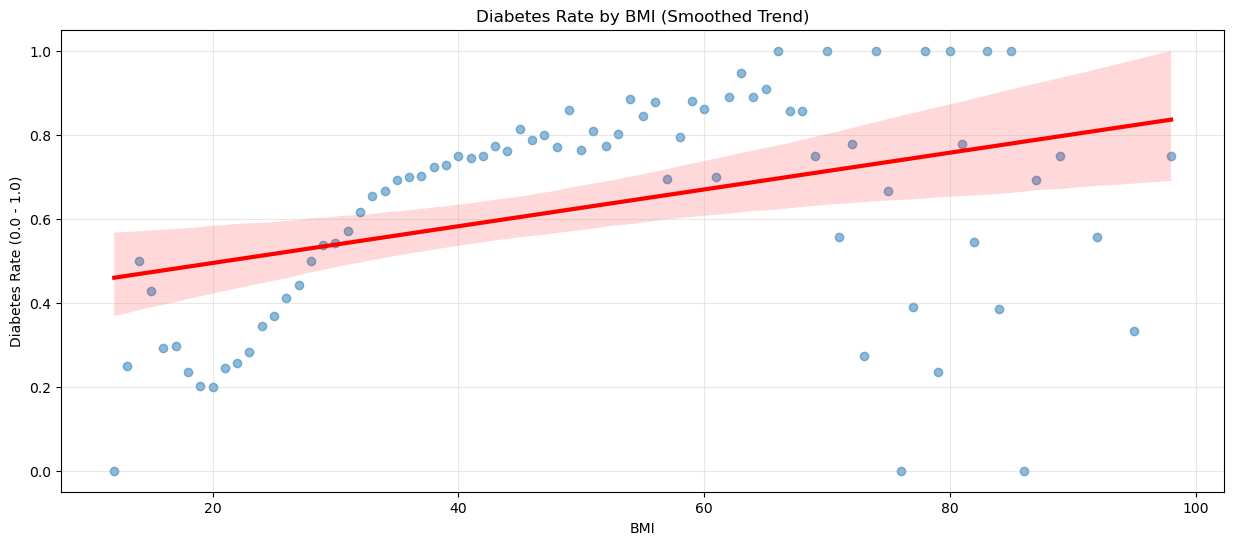

In [ ]:
# Even though I decided not to remove outliers for BMI, I want to make 
# sure that this is the correct decision so I will run more tests to determine it.
# First, I will calculate the diabetes rate for each BMI value so that I can plot it
# to see the exact relationship between BMI and diabetes rate.

# 1. Prepare the data
# Group by BMI and calculate the mean (which is the diabetes rate)
agg = df.groupby("BMI")['Diabetes_binary'].mean().reset_index()

# 2. Rename the column to 'Diabetes_Rate' for clarity
agg = agg.rename(columns={'Diabetes_binary': 'Diabetes_Rate'})

# 3. Plot 'Diabetes_Rate' against 'BMI'
plt.figure(figsize=(15, 6))
sns.regplot(
    x="BMI", 
    y="Diabetes_Rate", 
    data=agg, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red', 'linewidth': 3}
)

plt.title('Diabetes Rate by BMI (Smoothed Trend)')
plt.ylabel('Diabetes Rate (0.0 - 1.0)')
plt.xlabel('BMI')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
#  As seen from the plot above, BMI stops correlating with diabetes rate after
#  around a BMI of 65. Therefore, I will remove rows with BMI >= 67
results = []

# Iterating through BMI threshold filters from 50 to 70
for threshold in range(50, 71):
    # Filter the data based on current BMI threshold
    df_bmi_filtered = df[df['BMI'] <= threshold]
    
    X_bmir = df_bmi_filtered.drop('Diabetes_binary', axis=1)
    y_bmir = df_bmi_filtered['Diabetes_binary']
    
    # Split the data
    X_train_bmir, X_test_bmir, y_train_bmir, y_test_bmir = train_test_split(X_bmir, y_bmir, test_size=0.3, random_state=42)
    
    # Fit the model
    gb_optimized.fit(X_train_bmir, y_train_bmir)
    
    # Predict
    y_pred_bmir = gb_optimized.predict(X_test_bmir)
    
    # Calculate metrics
    current_recall = recall_score(y_test_bmir, y_pred_bmir)
    current_accuracy = accuracy_score(y_test_bmir, y_pred_bmir)
    current_precision = precision_score(y_test_bmir, y_pred_bmir)
    current_f1 = f1_score(y_test_bmir, y_pred_bmir)
    current_auc = roc_auc_score(y_test_bmir, y_pred_bmir)
    
    # Store results
    results.append({
        'threshold': threshold,
        'recall': current_recall,
        'accuracy': current_accuracy,
        'precision': current_precision,
        'f1': current_f1,
        'auc': current_auc
    })
    
    print(f"BMI Filter <= {threshold} | Recall: {current_recall:.4f} | Accuracy: {current_accuracy:.4f}")

# Find the threshold with the best recall
best_recall_run = max(results, key=lambda x: x['recall'])

print('\n--- Best Recall Results by BMI Threshold ---')
print(f"Best BMI Threshold: <= {best_recall_run['threshold']}")
print(f"Recall:    {best_recall_run['recall']:.4f}")
print(f"Accuracy:  {best_recall_run['accuracy']:.4f}")
print(f"Precision: {best_recall_run['precision']:.4f}")
print(f"F1 Score:  {best_recall_run['f1']:.4f}")
print(f"ROC AUC:   {best_recall_run['auc']:.4f}")


BMI Filter <= 50 | Recall: 0.7881 | Accuracy: 0.7420
BMI Filter <= 51 | Recall: 0.7969 | Accuracy: 0.7467
BMI Filter <= 52 | Recall: 0.7932 | Accuracy: 0.7473
BMI Filter <= 53 | Recall: 0.7931 | Accuracy: 0.7465
BMI Filter <= 54 | Recall: 0.7979 | Accuracy: 0.7495
BMI Filter <= 55 | Recall: 0.7991 | Accuracy: 0.7513
BMI Filter <= 56 | Recall: 0.8080 | Accuracy: 0.7549
BMI Filter <= 57 | Recall: 0.7997 | Accuracy: 0.7517
BMI Filter <= 58 | Recall: 0.7986 | Accuracy: 0.7504
BMI Filter <= 59 | Recall: 0.8010 | Accuracy: 0.7499
BMI Filter <= 60 | Recall: 0.8015 | Accuracy: 0.7492
BMI Filter <= 61 | Recall: 0.8008 | Accuracy: 0.7496
BMI Filter <= 62 | Recall: 0.7949 | Accuracy: 0.7460
BMI Filter <= 63 | Recall: 0.7993 | Accuracy: 0.7470
BMI Filter <= 64 | Recall: 0.8004 | Accuracy: 0.7472
BMI Filter <= 65 | Recall: 0.8041 | Accuracy: 0.7480
BMI Filter <= 66 | Recall: 0.8036 | Accuracy: 0.7479
BMI Filter <= 67 | Recall: 0.8032 | Accuracy: 0.7492
BMI Filter <= 68 | Recall: 0.7953 | Accuracy: 

In [ ]:
# Removing the bottom 4 least important features improved the model,
# increasing recall from 0.8039 to 0.8080, 
# F1 score from 0.7682 to 0.7705,
# accuracy from 0.7514 to 0.7549,
# and precision from 0.7358 to 0.7363.
# Overall, all metrics improved after removing outliers for BMI, so 
# the changes will definitely be kept in the final model. 

df = df[df['BMI'] <= best_recall_run['threshold']].copy()

<>:100: SyntaxWarning: invalid escape sequence '\ '
<>:100: SyntaxWarning: invalid escape sequence '\ '
C:\Users\isaac\AppData\Local\Temp\ipykernel_40256\567740439.py:100: SyntaxWarning: invalid escape sequence '\ '
  print(f"\ optimal k = {optimal_k} (using elbow method)")


Training set size: (47987, 17)
Test set size: (20567, 17)

Calculating WCSS for different k values...
k=1: WCSS = 815779.00
k=2: WCSS = 703141.28
k=3: WCSS = 655330.19
k=4: WCSS = 612026.14
k=5: WCSS = 574138.44
k=6: WCSS = 548025.63
k=7: WCSS = 527718.43
k=8: WCSS = 509275.67
k=9: WCSS = 492945.54
k=10: WCSS = 482105.74


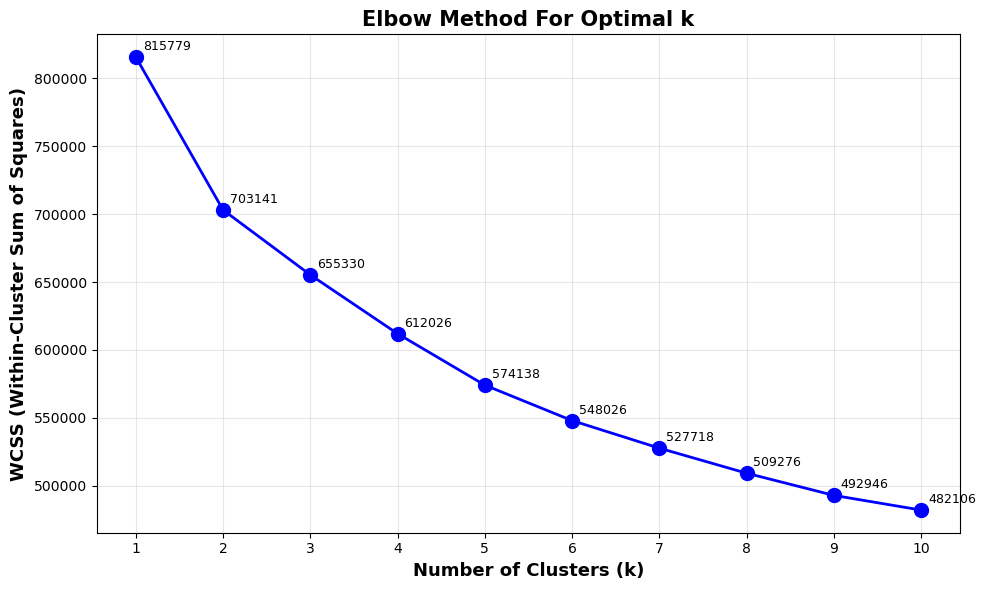


WCSS Decrease per k:
k=1 to k=2: Decrease = 112637.72
k=2 to k=3: Decrease = 47811.09
k=3 to k=4: Decrease = 43304.05
k=4 to k=5: Decrease = 37887.69
k=5 to k=6: Decrease = 26112.82
k=6 to k=7: Decrease = 20307.20
k=7 to k=8: Decrease = 18442.75
k=8 to k=9: Decrease = 16330.14
k=9 to k=10: Decrease = 10839.80


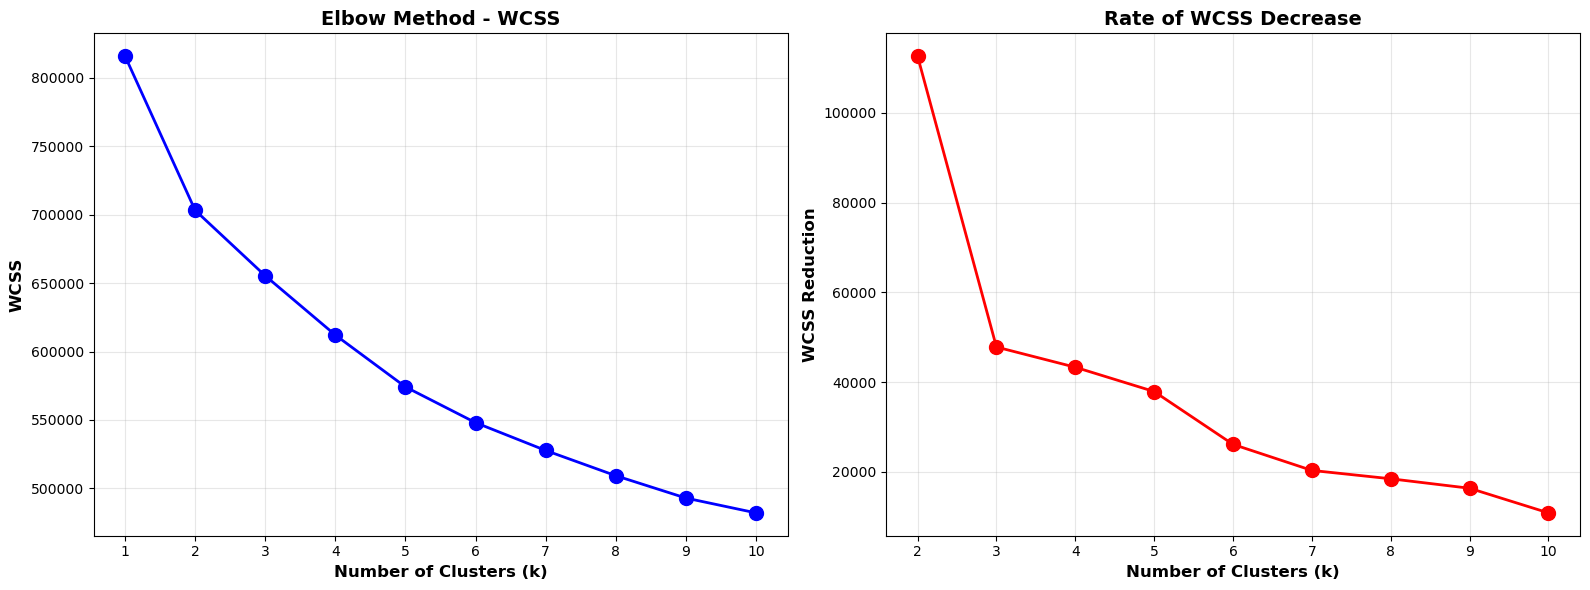

C:\Users\isaac\AppData\Local\Temp\ipykernel_40256\567740439.py:93: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)


\ optimal k = 5 (using elbow method)

Applying K-Means with k=5...

Cluster distribution in training set:
Cluster_Group
0     2011
1     9607
2    15943
3     2941
4    17485
Name: count, dtype: int64

Original features: 17
Features with clustering: 22
Added features: 5

Training model with k=5 cluster features

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74     10118
         1.0       0.74      0.80      0.76     10449

    accuracy                           0.75     20567
   macro avg       0.75      0.75      0.75     20567
weighted avg       0.75      0.75      0.75     20567


Confusion Matrix:
[[7121 2997]
 [2134 8315]]

Final Results:
Recall:    0.7958
Accuracy:  0.7505
f1: 0.7642


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split data first
X_original = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X_original, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate WCSS for different k values
wcss = []
K_range = range(1, 11)

print("\nCalculating WCSS for different k values...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
    print(f"k={k}: WCSS = {kmeans.inertia_:.2f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (k)', fontsize=13, fontweight='bold')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=13, fontweight='bold')
plt.title('Elbow Method For Optimal k', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Add value annotations
for i, (k, w) in enumerate(zip(K_range, wcss)):
    plt.annotate(f'{w:.0f}', xy=(k, w), xytext=(5, 5), 
                textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Calculate rate of decrease
wcss_diff = np.diff(wcss)
wcss_diff_rate = np.diff(wcss_diff)

print("\nWCSS Decrease per k:")
for i, diff in enumerate(wcss_diff, start=2):
    print(f"k={i-1} to k={i}: Decrease = {-diff:.2f}")

# Visual elbow detection with dual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# WCSS elbow curve
ax1.plot(K_range, wcss, 'bo-', linewidth=2, markersize=10)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('WCSS', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method - WCSS', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(K_range)

# Rate of change
ax2.plot(list(K_range)[1:], -wcss_diff, 'ro-', linewidth=2, markersize=10)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('WCSS Reduction', fontsize=12, fontweight='bold')
ax2.set_title('Rate of WCSS Decrease', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(list(K_range)[1:])

plt.tight_layout()
plt.show()

# Automated elbow detection
def find_elbow(wcss_values):
    """Find elbow using the maximum distance method"""
    x = np.array(range(len(wcss_values)))
    y = np.array(wcss_values)
    
    # Line from first to last point
    p1 = np.array([x[0], y[0]])
    p2 = np.array([x[-1], y[-1]])
    
    # Calculate distances from each point to the line
    distances = []
    for i in range(len(x)):
        p = np.array([x[i], y[i]])
        distance = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
        distances.append(distance)
    
    elbow_idx = np.argmax(distances)
    return elbow_idx + 1

optimal_k = find_elbow(wcss)
print(f"\ optimal k = {optimal_k} (using elbow method)")

# Apply K-Means with optimal k
print(f"\nApplying K-Means with k={optimal_k}...")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
train_clusters = kmeans_final.fit_predict(X_train_scaled)
test_clusters = kmeans_final.predict(X_test_scaled)

# Add cluster features
X_train_enriched = X_train.copy()
X_train_enriched['Cluster_Group'] = train_clusters

X_test_enriched = X_test.copy()
X_test_enriched['Cluster_Group'] = test_clusters

print(f"\nCluster distribution in training set:")
print(X_train_enriched['Cluster_Group'].value_counts().sort_index())

# One-hot encode clusters
X_train_final = pd.get_dummies(X_train_enriched, columns=['Cluster_Group'], 
                                prefix='Cluster', drop_first=False)
X_test_final = pd.get_dummies(X_test_enriched, columns=['Cluster_Group'], 
                               prefix='Cluster', drop_first=False)

# Align columns
X_train_final, X_test_final = X_train_final.align(X_test_final, join='left', 
                                                    axis=1, fill_value=0)

print(f"\nOriginal features: {X_train.shape[1]}")
print(f"Features with clustering: {X_train_final.shape[1]}")
print(f"Added features: {X_train_final.shape[1] - X_train.shape[1]}")

# Train and evaluate
print(f"\nTraining model with k={optimal_k} cluster features")

gb_optimized.fit(X_train_final, y_train)
y_pred = gb_optimized.predict(X_test_final)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nFinal Results:")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"f1: {f1_score(y_test, y_pred):.4f}")

In [ ]:
# Recall, accuracy and f1 did not improeve after adding cluster features.
# Therefore, I will not include cluster features in the final model.

In [ ]:
df.duplicated().sum()

np.int64(1963)

In [ ]:
df_dup = df.drop_duplicates(inplace=False)

X = df_dup.drop('Diabetes_binary', axis=1)
y = df_dup['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gb_optimized.fit(X_train, y_train)
y_pred = gb_optimized.predict(X_test)

print("--- Single Metrics ---")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}") 
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred):.4f}")

# Classification Report 
print("\n--- Report ---")
print(classification_report(y_test, y_pred))



--- Single Metrics ---
Recall:    0.7980
Accuracy:  0.7441
Precision: 0.7325
F1 Score:  0.7639
ROC AUC:   0.7420

--- Report ---
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      9617
         1.0       0.73      0.80      0.76     10361

    accuracy                           0.74     19978
   macro avg       0.75      0.74      0.74     19978
weighted avg       0.75      0.74      0.74     19978



In [ ]:
# Recall, accuracy and f1 did not improeve after adding cluster features.
# Therefore, I will not include cluster features in the final model.

In [ ]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gb_optimized.fit(X_train, y_train)
y_pred = gb_optimized.predict(X_test)
print("--- Single Metrics ---")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
joblib.dump(gb_optimized, 'diabetes_model.pkl')

--- Single Metrics ---
Recall:    0.8080
Accuracy:  0.7549


['diabetes_model.pkl']